<a href="https://colab.research.google.com/github/2303a52239/2303a52239-AIML/blob/main/stml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
!{sys.executable} -m pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.5 MB/s eta 0:00:00


In [3]:
import sys
!{sys.executable} -m pip install pandas EMD-signal matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00


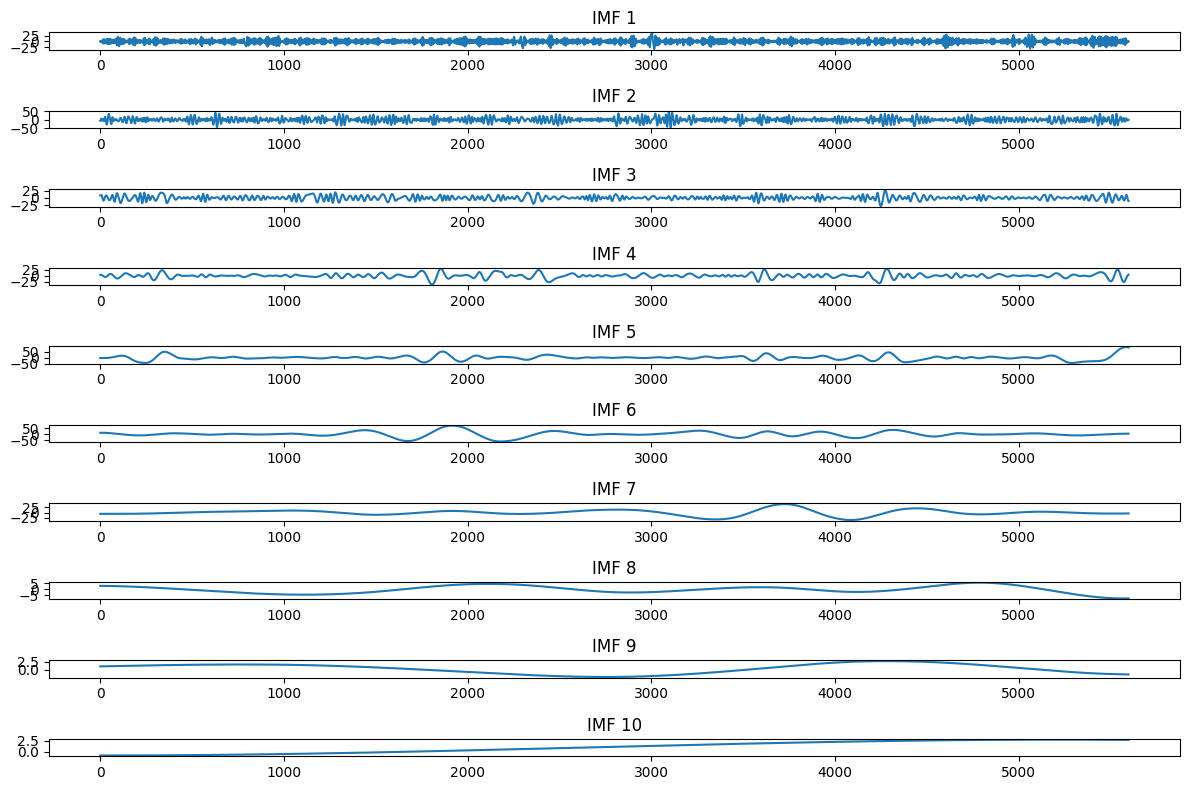

In [5]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
file_path = '/content/signals of eeg and eye.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Plot each IMF
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()
plt.show()


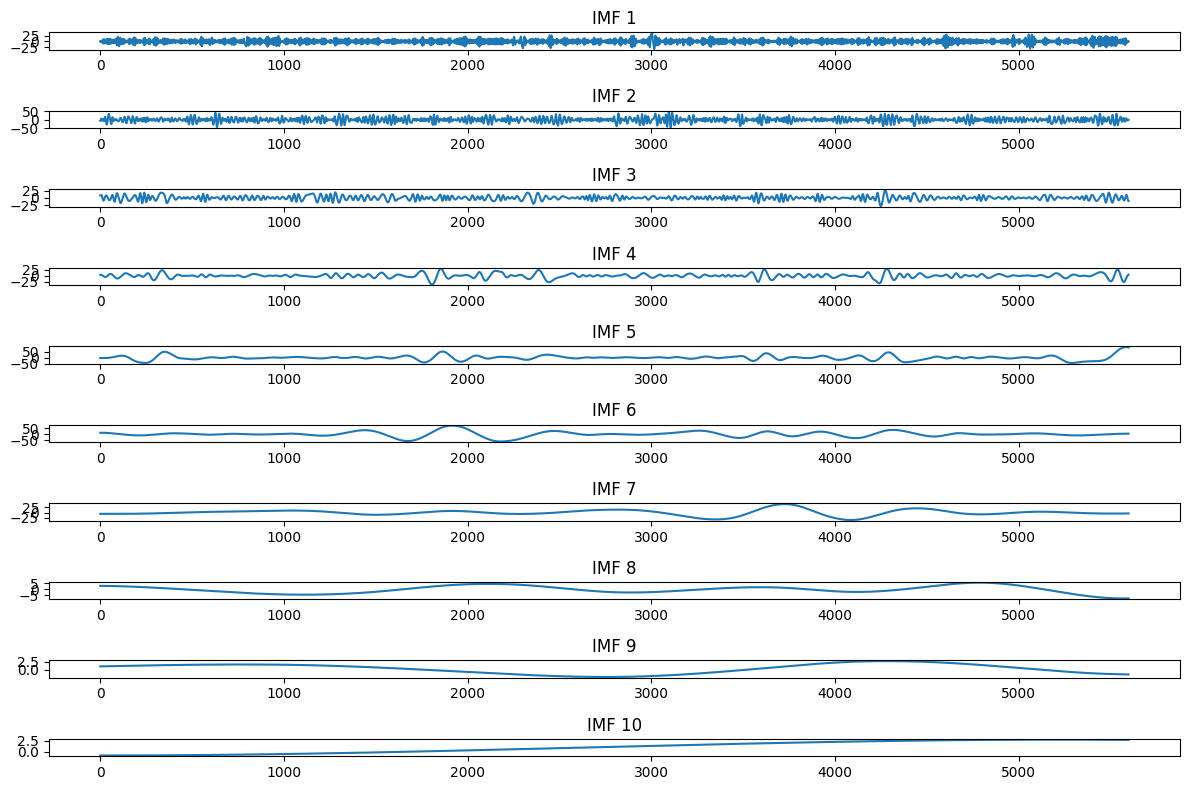

IMFs have been saved to both CSV and Excel formats.


In [6]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
input_file_path = '/content/signals of eeg and eye.xlsx'
output_file_path_csv = '/content/IMFs_output.csv'
output_file_path_excel = '/content/IMFs_output.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(input_file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Convert IMFs to a DataFrame to save
imf_df = pd.DataFrame(imfs.T, columns=[f'IMF_{i+1}' for i in range(imfs.shape[0])])

# Save to CSV
imf_df.to_csv(output_file_path_csv, index=False)

# Save to Excel
imf_df.to_excel(output_file_path_excel, index=False)

# Plot each IMF for visualization
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()
plt.show()

print("IMFs have been saved to both CSV and Excel formats.")


In [7]:
import pandas as pd
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import detrend

# File path to your Excel file
file_path = '/content/signals of eeg and eye.xlsx'

# Load the data from Excel
signal_data = pd.read_excel(file_path, sheet_name='Sheet1').iloc[:, 0].dropna().values

# Detrend the signal to remove linear trends
signal_data = detrend(signal_data)

# Initialize EMD object
emd = EMD()

# Decompose the signal into Intrinsic Mode Functions (IMFs)
imfs = emd(signal_data)

# Plot each IMF and save to a file
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f"IMF {i+1}")
plt.tight_layout()

# Save the plot as a file
output_image_path = '/content/imf_decomposition_plot.png'  # Adjust the path as needed
plt.savefig(output_image_path)
plt.close()

# Save IMFs to an Excel file
imf_df = pd.DataFrame(imfs).T  # Transpose so each IMF is a row
output_excel_path = '/content/imfs_output.xlsx'  # Adjust the path as needed
imf_df.to_excel(output_excel_path, index=False)

print(f"IMF decomposition plot saved to: {output_image_path}")
print(f"IMFs saved to: {output_excel_path}")


IMF decomposition plot saved to: /content/imf_decomposition_plot.png
IMFs saved to: /content/imfs_output.xlsx


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Load the IMF data from your Excel file
file_path = '/content/imfs_output.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Select the first IMF column (assuming it’s the first column in the data)
first_imf = data.iloc[:, 0].dropna().values  # Remove NaNs if any

# Define a threshold (adjust as needed)
threshold = 0.5
filtered_imf = first_imf[first_imf > threshold]

# Calculate kurtosis on the filtered IMF data
kurt_value = kurtosis(filtered_imf)
print(f"Kurtosis of the first IMF after applying threshold: {kurt_value}")

Kurtosis of the first IMF after applying threshold: 3.2163676798925476


In [9]:
import pandas as pd
from scipy.stats import kurtosis

# Load the data
file_path = '/content/imfs_output.xlsx'
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Calculate kurtosis for each column
kurtosis_results = {column: kurtosis(data[column], fisher=True) for column in data.columns}

# Convert results to a DataFrame for easy viewing
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['kurtosis'])
print(kurtosis_df)


   kurtosis
0  0.679730
1  0.295135
2  0.603121
3  2.506065
4  4.205989
5  1.964168
6  1.371557
7 -0.553530
8 -1.205000
9 -1.507112


In [10]:
import os

# Ensure the output directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the file after ensuring the directory exists
output_path = os.path.join(output_dir, 'kurtosis_threshold_status.xlsx')
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")


Kurtosis results with threshold status saved to /mnt/data/kurtosis_threshold_status.xlsx


In [11]:
# Save to the current working directory
output_path = 'kurtosis_threshold_status.xlsx'
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")


Kurtosis results with threshold status saved to kurtosis_threshold_status.xlsx


In [12]:
import pandas as pd
from scipy.stats import kurtosis

# Load the data
file_path = '/content/imfs_output.xlsx'
sheet_name = 'Sheet1'  # Update the sheet name if necessary
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure numeric data
numeric_data = data.select_dtypes(include='number')

# Calculate kurtosis
kurtosis_results = {
    column: kurtosis(numeric_data[column].dropna(), fisher=True)
    for column in numeric_data.columns
}

# Convert results to a DataFrame
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['Kurtosis'])

# Define thresholds
threshold_upper = 3
threshold_lower = -3

# Determine if columns are within or exceed thresholds
def classify_kurtosis(value, lower, upper):
    if value > upper:
        return "Exceeds Upper Threshold"
    elif value < lower:
        return "Exceeds Lower Threshold"
    else:
        return "Within Threshold"

kurtosis_df['Threshold_Status'] = kurtosis_df['Kurtosis'].apply(
    classify_kurtosis, lower=threshold_lower, upper=threshold_upper
)

# Save results to a new Excel file
output_path = '/content/kurtosis_threshold_status.xlsx'
kurtosis_df.to_excel(output_path)
print(f"Kurtosis results with threshold status saved to {output_path}")

# Output summary
print("Summary of threshold classifications:")
print(kurtosis_df)


Kurtosis results with threshold status saved to /content/kurtosis_threshold_status.xlsx
Summary of threshold classifications:
   Kurtosis         Threshold_Status
0  0.679730         Within Threshold
1  0.295135         Within Threshold
2  0.603121         Within Threshold
3  2.506065         Within Threshold
4  4.205989  Exceeds Upper Threshold
5  1.964168         Within Threshold
6  1.371557         Within Threshold
7 -0.553530         Within Threshold
8 -1.205000         Within Threshold
9 -1.507112         Within Threshold


In [13]:
import pandas as pd
from scipy.stats import kurtosis
import os

# Load the data
file_path = '/content/imfs_output.xlsx'
sheet_name = 'Sheet1'  # Update if necessary
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure numeric data
numeric_data = data.select_dtypes(include='number')

# Calculate kurtosis
kurtosis_results = {
    column: kurtosis(numeric_data[column].dropna(), fisher=True)
    for column in numeric_data.columns
}

# Convert results to a DataFrame
kurtosis_df = pd.DataFrame.from_dict(kurtosis_results, orient='index', columns=['Kurtosis'])

# Define thresholds
threshold_upper = 3
threshold_lower = -3

# Determine if columns are within or exceed thresholds
def classify_kurtosis(value, lower, upper):
    if value > upper:
        return "Exceeds Upper Threshold"
    elif value < lower:
        return "Exceeds Lower Threshold"
    else:
        return "Within Threshold"

kurtosis_df['Threshold_Status'] = kurtosis_df['Kurtosis'].apply(
    classify_kurtosis, lower=threshold_lower, upper=threshold_upper
)

# Split data into two categories
within_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Within Threshold"]
upper_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Exceeds Upper Threshold"]
lower_threshold = kurtosis_df[kurtosis_df['Threshold_Status'] == "Exceeds Lower Threshold"]

# Ensure the output directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save results into different sheets in a single Excel file
output_path = os.path.join(output_dir, 'kurtosis_threshold_separation.xlsx')
with pd.ExcelWriter(output_path) as writer:
    within_threshold.to_excel(writer, sheet_name='Within Threshold')
    upper_threshold.to_excel(writer, sheet_name='Exceeds Upper Threshold')
    lower_threshold.to_excel(writer, sheet_name='Exceeds Lower Threshold')

print(f"Separated results saved to {output_path}")


Separated results saved to /mnt/data/kurtosis_threshold_separation.xlsx


In [14]:
from google.colab import files
files.download('/mnt/data/kurtosis_threshold_separation.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
pip install pandas openpyxl


In [16]:
import pandas as pd

# Load your Excel file
file_path = "/content/imfs_output.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Separate the 5th column (index 4)
col_5 = df.iloc[:, 4]
other_columns = df.drop(columns=[4])

# Reshape the remaining columns into one column
other_columns_melted = pd.melt(other_columns, value_vars=other_columns.columns)
other_columns_melted = other_columns_melted.drop(columns=["variable"])
other_columns_melted.columns = ["Value"]
other_columns_melted["Label"] = 0

# Prepare the 5th column data
col_5_df = pd.DataFrame({"Value": col_5, "Label": 1})

# Save to Excel
col_5_file = "col_5.xlsx"
other_columns_file = "other_columns_updated.xlsx"

col_5_df.to_excel(col_5_file, index=False)
other_columns_melted.to_excel(other_columns_file, index=False)

print(f"Files saved:\n1. {col_5_file}\n2. {other_columns_file}")


Files saved:
1. col_5.xlsx
2. other_columns_updated.xlsx


In [17]:
import pandas as pd

# Load the two Excel files
col_5_file = "col_5.xlsx"  # Replace with your actual file path
other_columns_file = "other_columns_updated.xlsx"  # Replace with your actual file path

col_5_df = pd.read_excel(col_5_file)
other_columns_df = pd.read_excel(other_columns_file)

# Merge the two dataframes
merged_df = pd.concat([col_5_df, other_columns_df], ignore_index=True)

# Save the merged dataframe to a new Excel file
merged_file = "merged_file.xlsx"
merged_df.to_excel(merged_file, index=False)

print(f"Merged file saved as: {merged_file}")


Merged file saved as: merged_file.xlsx


In [18]:
pip install pandas scikit-learn pyclustering openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=5f99e82b64a73a7bb7f87bb9fa0cc9dad640d42afed6e92e588832113a309b0b
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = '/content/merged_file.xlsx'
data = pd.read_excel(file_path)

# Inspect the columns in the dataset
print("Columns in dataset:", data.columns)

# Update feature and target column names to match the dataset
X = data[['Value']]  # Feature column (update based on dataset)
y = data['Label']    # Target column (update based on dataset)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Classification Report:\n{report}")


Columns in dataset: Index(['Value', 'Label'], dtype='object')
Accuracy: 83.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10070
           1       0.17      0.16      0.16      1128

    accuracy                           0.83     11198
   macro avg       0.54      0.53      0.54     11198
weighted avg       0.83      0.83      0.83     11198

